### Modelling and Analysis of Complex Networks
## Exercise 4
Name: Rukhsar Ahmed

# First of all we import our dataset using pandas library.

In [17]:

import pandas as pd
facebook_edges='414.edges' #
twitter_edges='1046661.edges'

Here we can see that we have two nodes in every row and also notice that these nodes are connected by an edge. First we separate these nodes using numpy library because we have two different network so we apply this process twice.

In [18]:
import networkx as nx
facebook_network= nx.read_edgelist(facebook_edges,create_using= nx.Graph(),nodetype=int)
twitter_network = nx.read_edgelist(twitter_edges,create_using= nx.DiGraph(),nodetype=int)


# (a) Choose one of the datasets, calculate the betweenness closeness and PageRank mentioned in the lecture on all of the nodes.

In [19]:
import matplotlib.pyplot as plt
from sympy import symbols, Eq
betweeness=nx.betweenness_centrality(facebook_network) #calculate all the betweeness
pagerank=nx.pagerank(facebook_network, alpha=0.9)#calculate the pagerank

For presenting our result I use a dataframe to show node number with corresponding betweeness closeness and pagerank.

In [20]:
df = pd.DataFrame.from_dict(([betweeness,pagerank]),orient='columns' )
dft=df.T
dft=dft.rename(columns={dft.columns[0]: 'betweenness closeness',dft.columns[1]: 'pagerank'})
dft.head(10)

betweenness closeness  pagerank
650               0.001334  0.006673
647               0.051393  0.005798
461               0.018501  0.008434
544               0.001167  0.008378
614               0.003929  0.007727
515               0.013557  0.008055
363               0.008870  0.007994
348               0.041033  0.012063
436               0.226118  0.011151
428               0.049265  0.012941

# Please compare the results

- <b>Betweenness closeness</b>      
Betweenness closeness tells us,how much the node plays the role of a bridge. Suppose, we want to calculater the betweenness of node i,take fraction of all the shortest paths
between all the pairs of nodes going through i.
- <b>Page Rank</b>  
The PageRank measures the importance of each node within the graph, based on the number incoming relationships and the importance of the corresponding source nodes.


In [21]:
difference= dict(betweeness.items()-pagerank.items())
difference= {key: betweeness[key] - pagerank.get(key, 0)
                       for key in betweeness.keys()}
dft['difference']=pd.Series(difference)
dft

betweenness closeness  pagerank  difference
650               0.001334  0.006673   -0.005339
647               0.051393  0.005798    0.045595
461               0.018501  0.008434    0.010067
544               0.001167  0.008378   -0.007211
614               0.003929  0.007727   -0.003798
..                     ...       ...         ...
648               0.000000  0.000984   -0.000984
679               0.000887  0.002582   -0.001695
667               0.000000  0.001454   -0.001454
642               0.000000  0.006667   -0.006667
581               0.000000  0.006667   -0.006667

[150 rows x 3 columns]

# (b) Please compare the results in (a). What cause the difference between the results?



Betweenness centrality measures the extent to which a vertex lies on paths between other vertices. Nodes with high betweenness may have considerable influence within a network by virtue of their control over information passing between others.
Betweenness centrality demonstrates how many paths it is a part of, which represent that node’s ability to make connections to other groups in the graph.

The PageRank of a page is defined recursively and depends on the number and PageRank metric of all pages that link to it ("incoming links"). A page that is linked to by many pages with high PageRank receives a high rank itself.
So for it varies the number of  connected  connected node within that node. And the value also depends on type of graph( Directed or indirected).


# (c) Please plot the largest strong connected component in the Twitter-Ego dataset.

In [22]:
largest = max(nx.strongly_connected_components(twitter_network), key=len) # largest takes all the strongly connected nodes of twitter.
G0=twitter_network.subgraph(largest)
#print(largest)
print('Number of Largest strongly connected nodes are :', len(largest))
print('               Number of nodes in Twitter are : ', len(twitter_network))

Number of Largest strongly connected nodes are : 103
               Number of nodes in Twitter are :  128


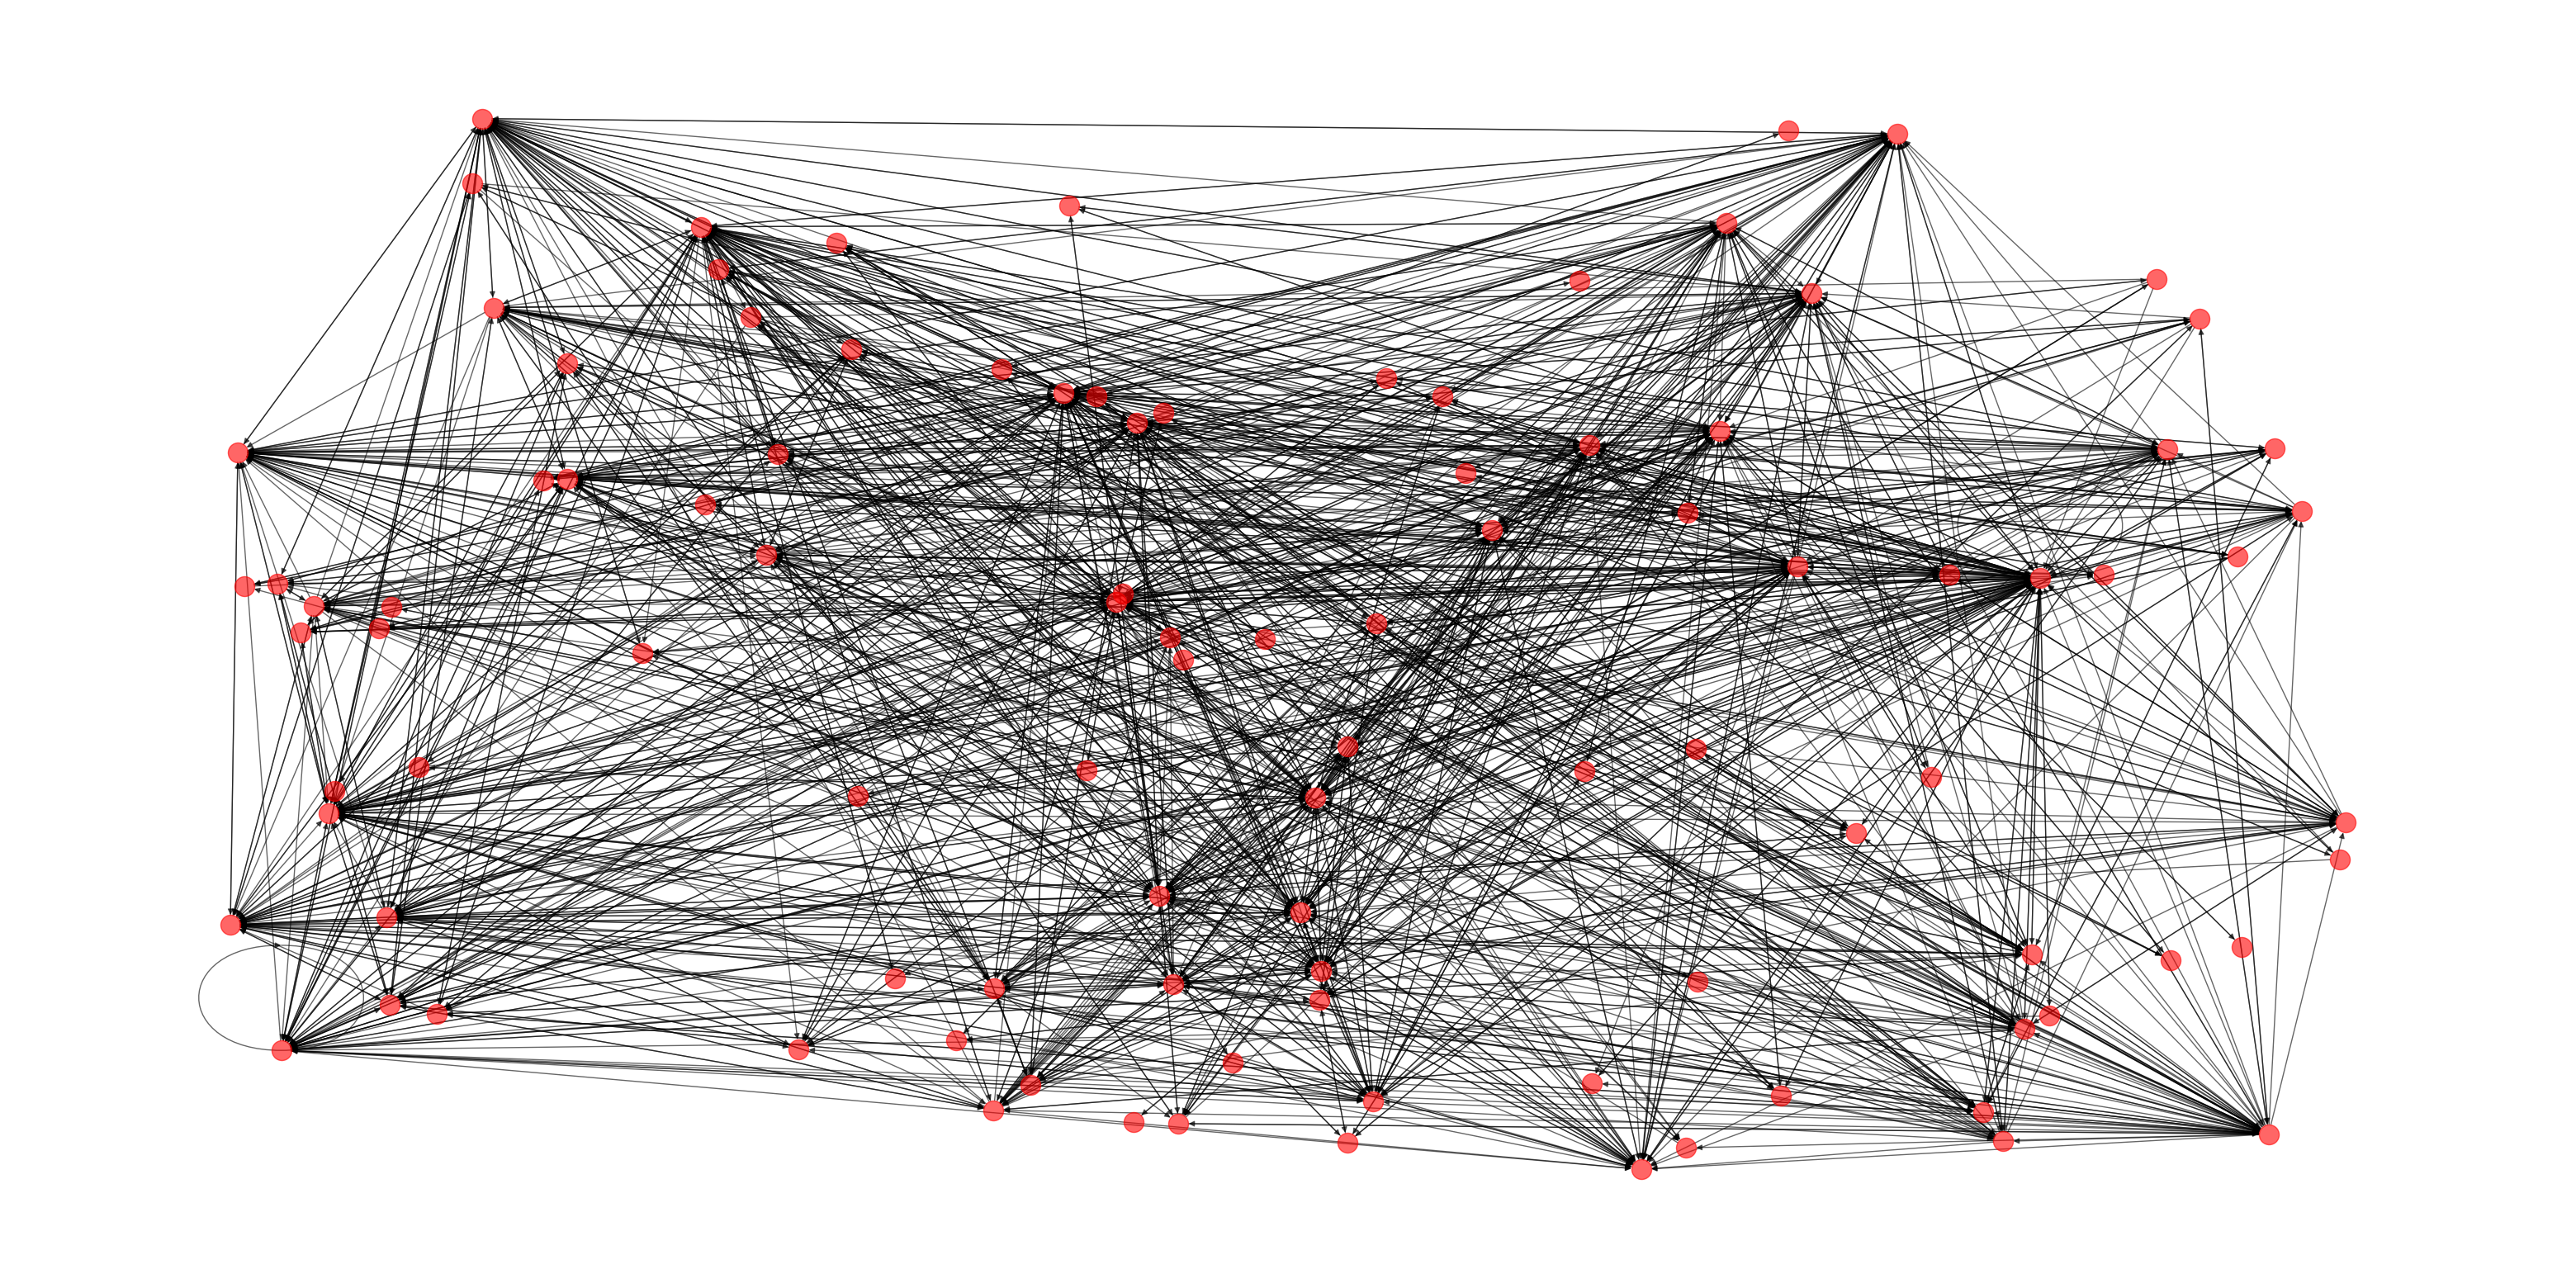

In [23]:
fig, ax1 = plt.subplots(figsize=(40, 20))
nx.draw_random(G0,node_color='red',alpha=0.6,ax=ax1)

# (d) Choose the results of one of the two algorithms mentioned in question (a), and choose the node with the highest value and the node with lowest value. Please plot the distributions of Jaccard similarity, cosine similarity and normalized Euclidean distance between either of the two nodes and the rest of the nodes in the graph.


In [24]:
maximum_piar=max(zip(pagerank.values(),pagerank.keys())) #find max value of page rank alogorithm
minimum_piar=min(zip(pagerank.values(),pagerank.keys())) #find min value of page rank alogorithm

print(f"Highest  ** Node : {maximum_piar[1]}  value: {maximum_piar[0]} ")
print(f"Lowest   ** Node : {minimum_piar[1]}  value: {minimum_piar[0]} ")

Highest  ** Node : 376  value: 0.014404275623255582 
Lowest   ** Node : 648  value: 0.0009841347153661984 


In [25]:
# All Combination
maximum_pairs = [(maximum_piar[1], i) for i in list(facebook_network.nodes) if maximum_piar[1] != i]
minimum_pairs = [(minimum_piar[1], i) for i in list(facebook_network.nodes) if minimum_piar[1] != i]

In [26]:
def plot_dist(data,x):
    fig, (ax2) = plt.subplots(ncols=1 ,figsize=(14, 7))
    ax2.hist(data, bins=10)
    ax2.set_title(f"Distribution of {x}")
    plt.tight_layout()
    plt.show()

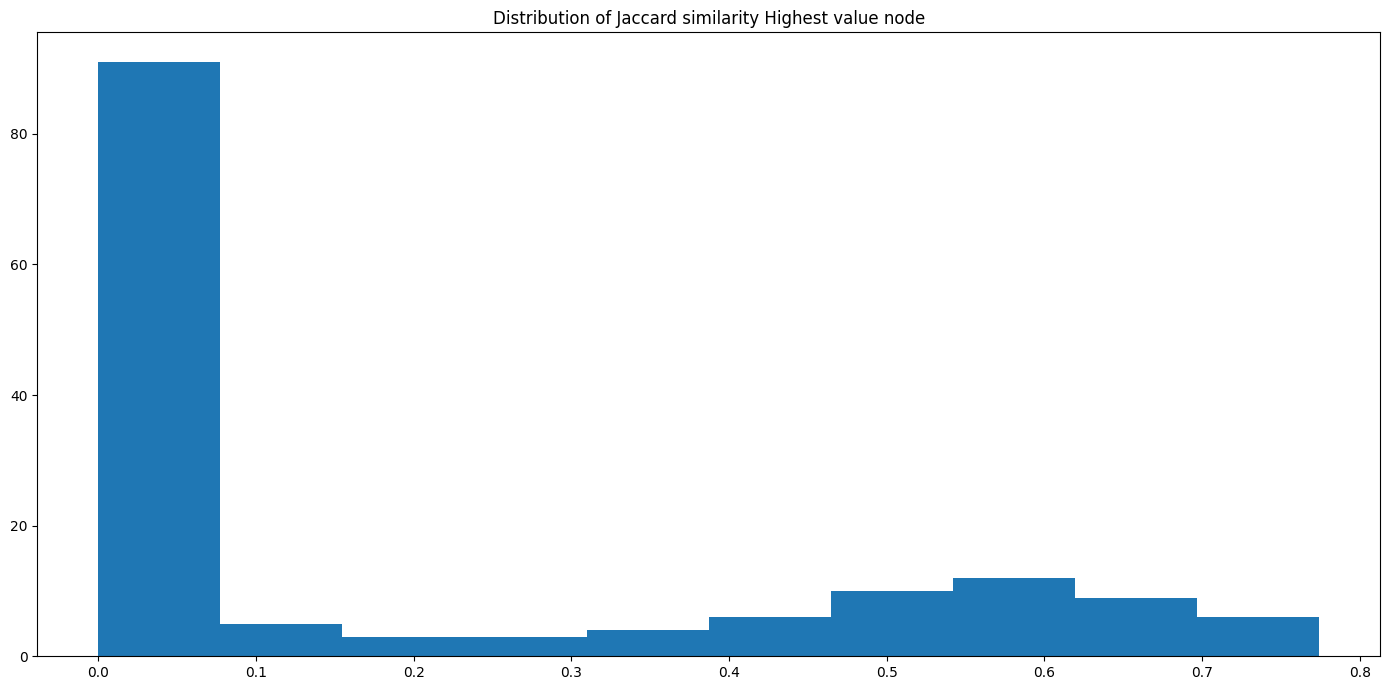

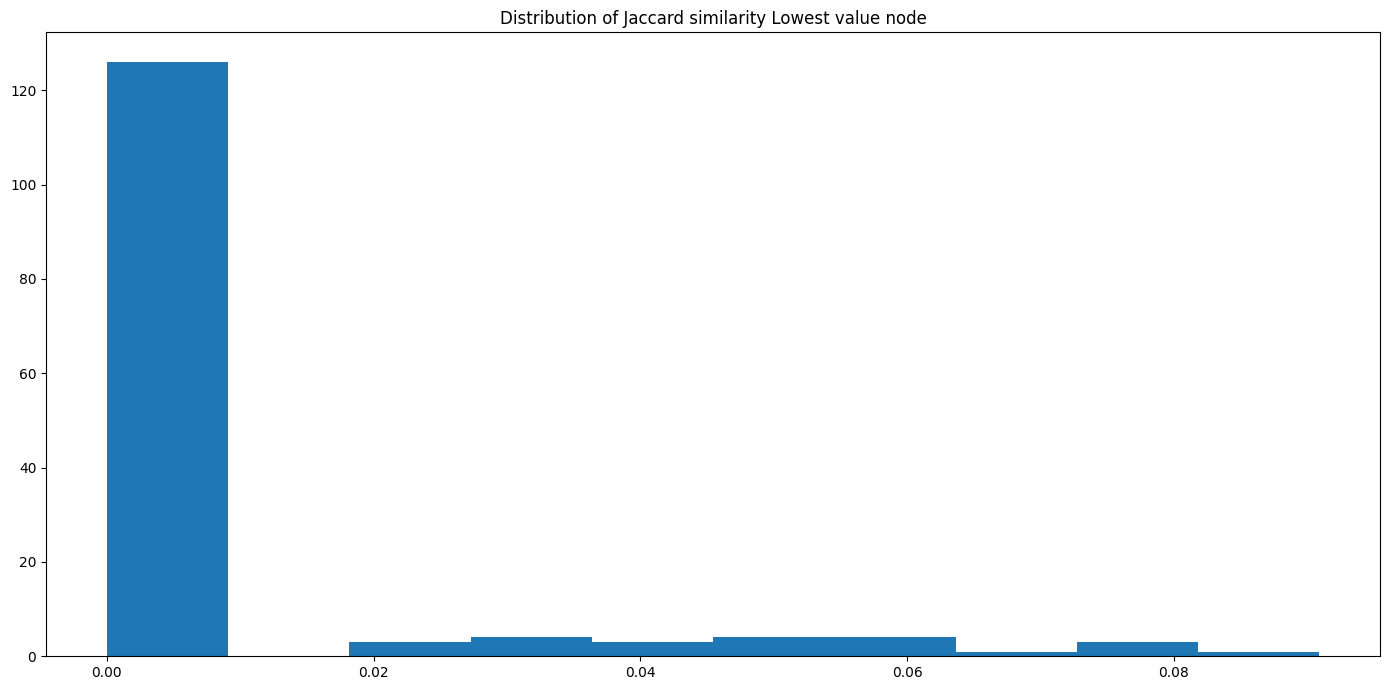

In [27]:
preds_maximum = nx.jaccard_coefficient(facebook_network, maximum_pairs)
preds_minimum = nx.jaccard_coefficient(facebook_network, minimum_pairs)
plot_dist([p for u,v,p in preds_maximum],"Jaccard similarity Highest value node");
plot_dist([p for u,v,p in preds_minimum],"Jaccard similarity Lowest value node");

In [28]:
import math
def cos_sim_(nodes):
    for i,j in nodes:
        N_i_N_j = len(list(nx.common_neighbors(facebook_network,i,j)))
        N_i = len(list(facebook_network.neighbors(i)))
        N_j = len(list(facebook_network.neighbors(j)))
        mean = math.sqrt(N_i*N_j)
        cos_sim = N_i_N_j/mean
        yield cos_sim

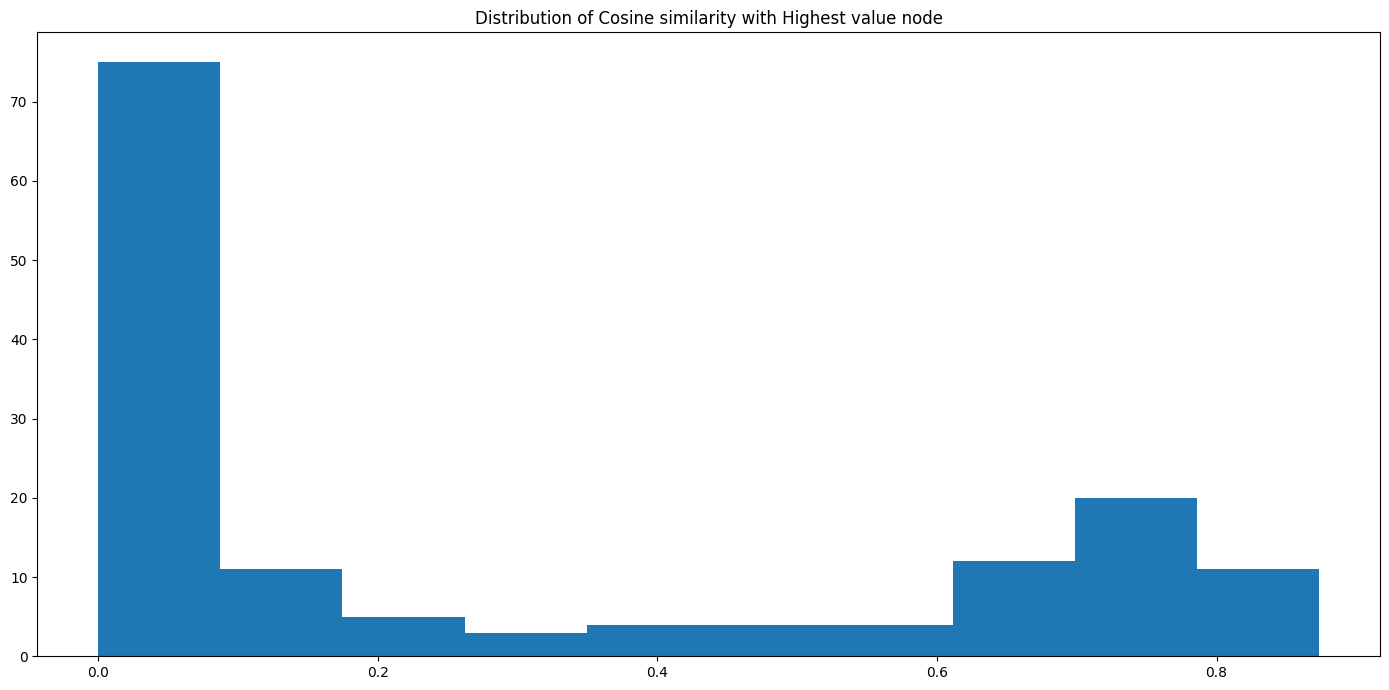

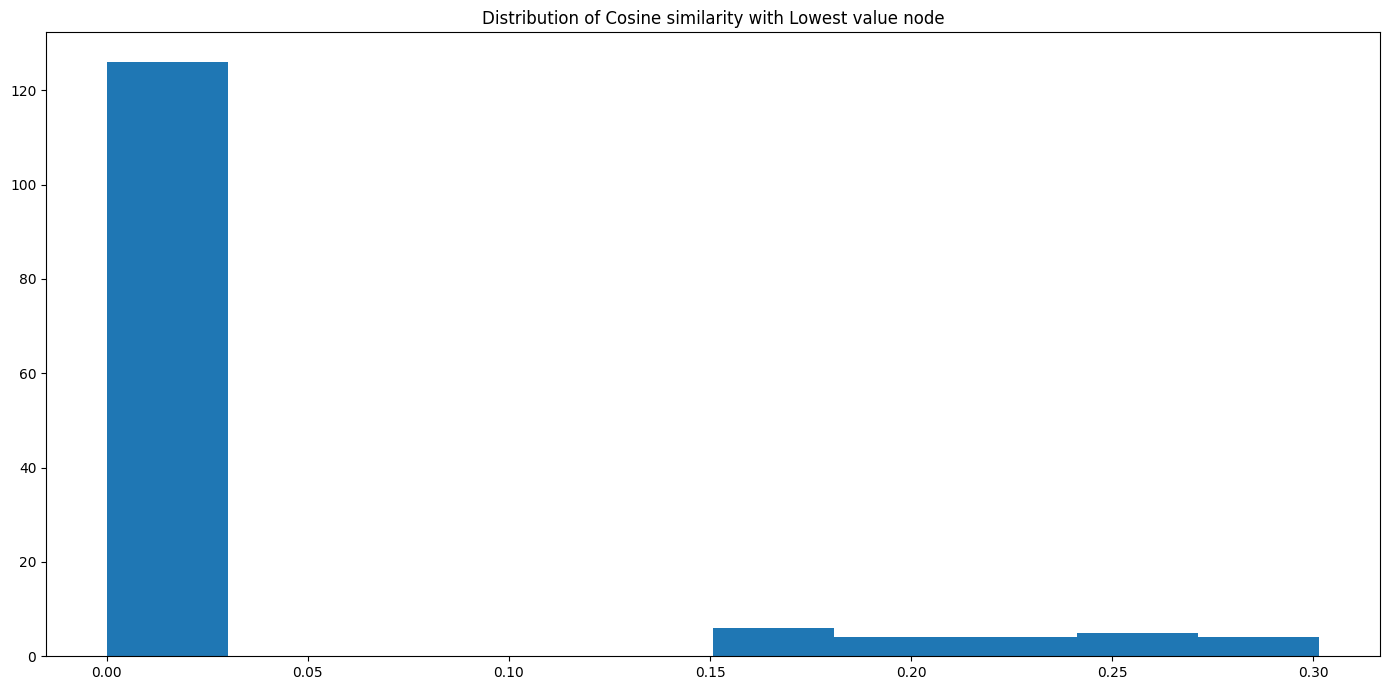

In [29]:
preds_maximum = cos_sim_(maximum_pairs)
preds_minimum = cos_sim_( minimum_pairs)
plot_dist([p for p in preds_maximum],"Cosine similarity with Highest value node");
plot_dist([p for p in preds_minimum],"Cosine similarity with Lowest value node");

In [30]:
#calculate eucledian distance
def euclidean_(nodes):
    for i,j in nodes:
            N_i_N_j = len(list(nx.common_neighbors(facebook_network,i,j)))
            N_i = len(list(facebook_network.neighbors(i)))
            N_j = len(list(facebook_network.neighbors(j)))
            sum_ij = N_i+N_j
            dist = 1 - (2*(N_i_N_j/sum_ij))
            yield dist


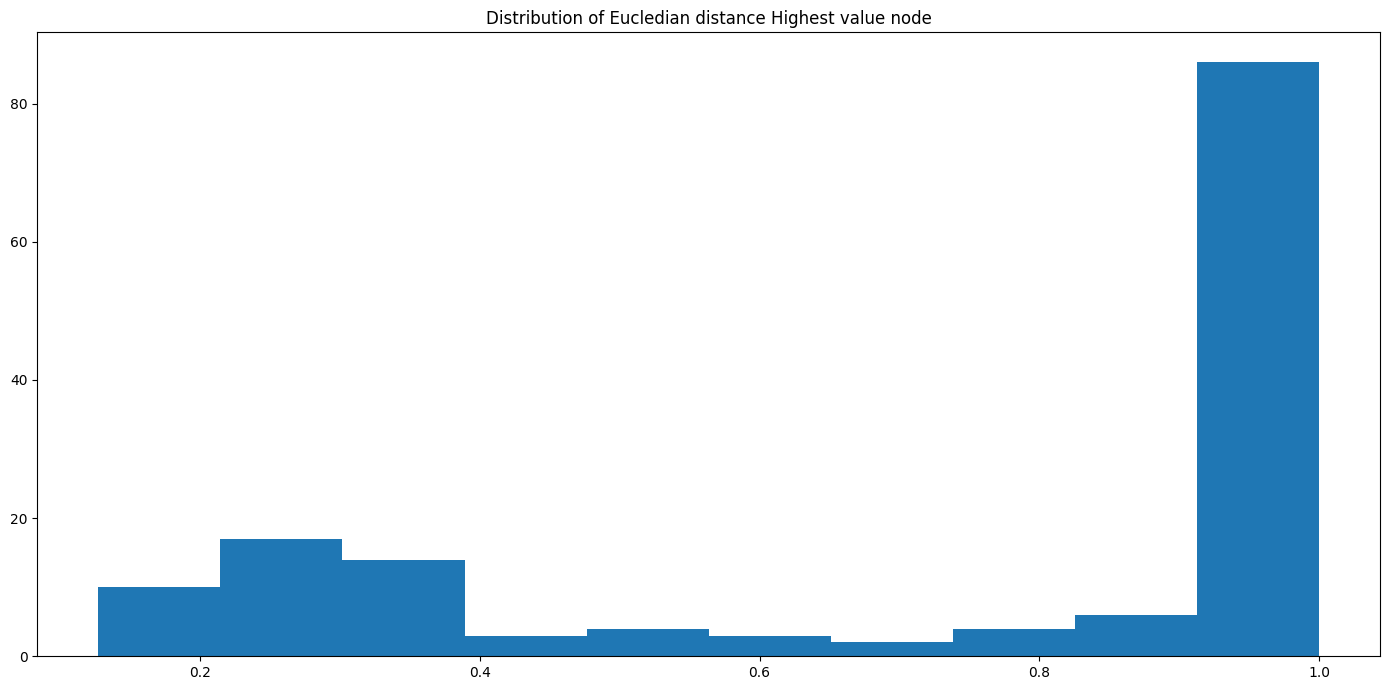

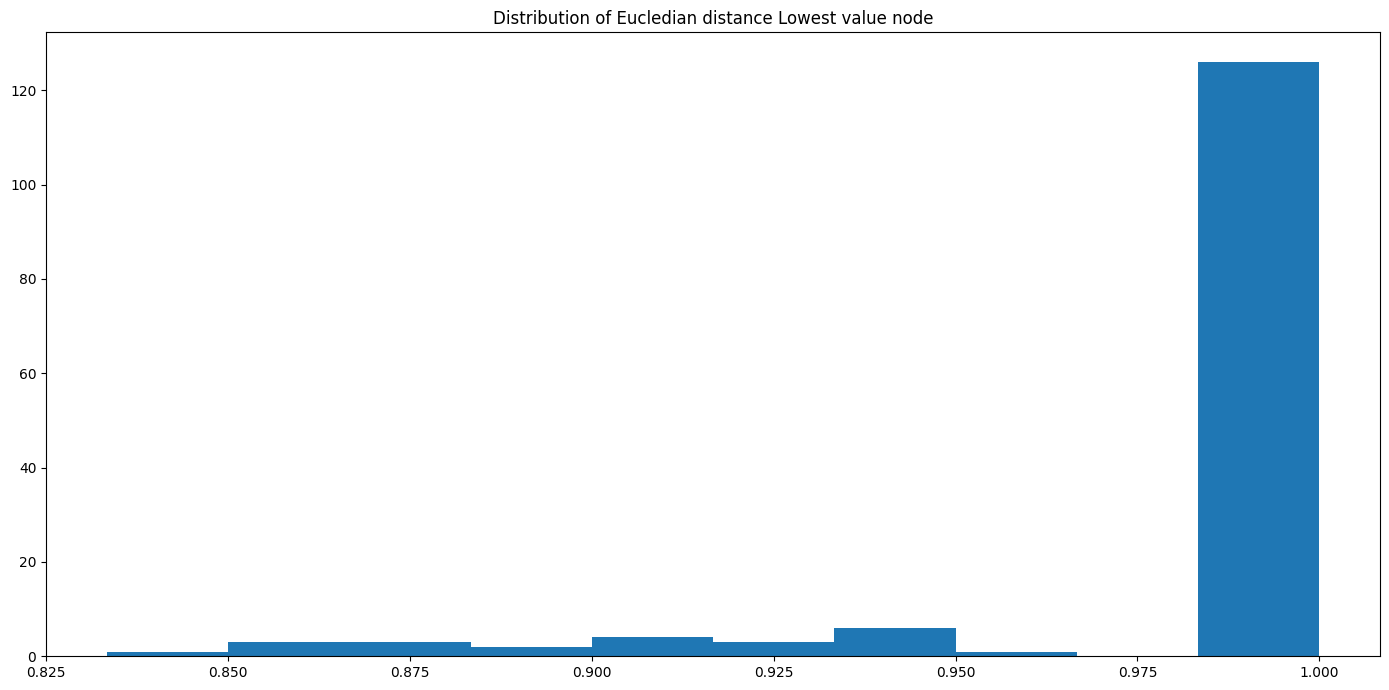

In [31]:
preds_maximum = euclidean_(maximum_pairs)
preds_minimum = euclidean_( minimum_pairs)
plot_dist([p for p in preds_maximum],"Eucledian distance Highest value node");
plot_dist([p for p in preds_minimum],"Eucledian distance Lowest value node");